# Visualizing Errors

This tutorial covers how to visualize the confidence intervals predicted from error models.

In [1]:
import olorenchemengine as oce
import pandas as pd
import numpy as np

df = pd.read_csv(oce.download_public_file("MoleculeNet/load_lipo.csv"))[["smiles","exp"]]

# Use smaller dataset for speed, remove this line for full dataset
df = df.sample(100)

dataset = oce.BaseDataset(data = df.to_csv(),
    property_col = "exp",
    structure_col = "smiles") + oce.RandomSplit()

model = oce.TOP_MODELS_ADMET()[1]
model.fit(*dataset.train_dataset)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


We start by building and fitting an error model using the training and validation dataset, respectively.

In [4]:
error_model = oce.TrainDistDC(ci=0.8)
error_model.build(model, dataset.train_dataset[0], dataset.train_dataset[1])

100%|██████████| 10/10 [00:00<00:00, 2009.44it/s]


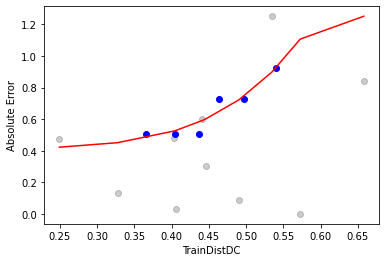

In [8]:
error_model.fit(dataset.valid_dataset[0], dataset.valid_dataset[1], window=5)

We are now ready to predict errors. 

In [9]:
pred = model.predict(dataset.test_dataset[0])
err = error_model.score(dataset.test_dataset[0])

100%|██████████| 10/10 [00:00<00:00, 2134.07it/s]


Visualizations can be performed with the ```VisualizeError``` class, a ```BaseVisualization``` object. We must input the reference dataset, the predicted value, and the error value.

In [10]:
vis = oce.VisualizeError(dataset, pred[0], err[0])
vis.render_ipynb()

The green plot is a density plot of outputs from the reference dataset. The probable property value range for the target molecule is shaded in purple, and the predicted property value is the purple dividing line.

You can optionally choose to omit the boxplot and/or the points displayed below the density plot.

In [11]:
vis = oce.VisualizeError(dataset, pred[0], err[0], box=False, points=False)
vis.render_ipynb()